In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,joblib

In [2]:
Data_file_path="https://raw.githubusercontent.com/upflairs-pvt-ltd/1st_june_data_science/master/customer_satisfaction/cust_satisfaction.csv"
df=pd.read_csv(Data_file_path)

In [3]:
df.head()

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0


Logistic regression


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      103904 non-null  object 
 1   Customer Type               103904 non-null  object 
 2   Type of Travel              103904 non-null  object 
 3   Class                       103904 non-null  object 
 4   satisfaction                103904 non-null  object 
 5   Age                         103904 non-null  int64  
 6   Flight Distance             103904 non-null  int64  
 7   Inflight entertainment      103904 non-null  int64  
 8   Baggage handling            103904 non-null  int64  
 9   Cleanliness                 103904 non-null  int64  
 10  Departure Delay in Minutes  103904 non-null  int64  
 11  Arrival Delay in Minutes    103594 non-null  float64
dtypes: float64(1), int64(6), object(5)
memory usage: 9.5+ MB


In [5]:
df.duplicated().sum()

np.int64(172)

In [6]:
df.isnull().sum()

Gender                          0
Customer Type                   0
Type of Travel                  0
Class                           0
satisfaction                    0
Age                             0
Flight Distance                 0
Inflight entertainment          0
Baggage handling                0
Cleanliness                     0
Departure Delay in Minutes      0
Arrival Delay in Minutes      310
dtype: int64

In [7]:
df.dropna( inplace=True)

In [8]:
df.isnull().sum()

Gender                        0
Customer Type                 0
Type of Travel                0
Class                         0
satisfaction                  0
Age                           0
Flight Distance               0
Inflight entertainment        0
Baggage handling              0
Cleanliness                   0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
dtype: int64

In [9]:

female = df[df['Gender'] == 'Female']
female['Customer Type'].value_counts()

Customer Type
Loyal Customer       42336
disloyal Customer    10240
Name: count, dtype: int64

In [10]:

male = df[df['Gender'] == 'Male']
male['Customer Type'].value_counts()

Customer Type
Loyal Customer       42326
disloyal Customer     8692
Name: count, dtype: int64

In [11]:
df['Type of Travel'].value_counts()

Type of Travel
Business travel    71465
Personal Travel    32129
Name: count, dtype: int64

In [12]:
df['Class'].value_counts()

Class
Business    49533
Eco         46593
Eco Plus     7468
Name: count, dtype: int64

In [13]:
df['satisfaction'].value_counts()

satisfaction
neutral or dissatisfied    58697
satisfied                  44897
Name: count, dtype: int64

In [14]:
df

,Gender,Customer Type,Type of Travel,Class,satisfaction,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied,13,460,5,4,5,25,18.0
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,25,235,1,3,1,1,6.0
2,Female,Loyal Customer,Business travel,Business,satisfied,26,1142,5,4,5,0,0.0
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied,25,562,2,3,2,11,9.0
4,Male,Loyal Customer,Business travel,Business,satisfied,61,214,3,4,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,23,192,2,4,2,3,0.0
103900,Male,Loyal Customer,Business travel,Business,satisfied,49,2347,5,5,4,0,0.0
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied,30,1995,4,4,4,7,14.0
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied,22,1000,1,1,1,0,0.0


In [15]:
label=list(df['Class'].value_counts().keys())

count=list(df['Class'].value_counts().values)

([<matplotlib.patches.Wedge at 0x2147f5e7bc0>,
 [Text(0.07546455501046449, 1.0974083565095871, 'Business'),
  Text(-0.31995341789970977, -1.0524399319554032, 'Eco'),
  Text(1.0719105811611045, -0.24699738054251363, 'Eco Plus')],
 [Text(0.04116248455116244, 0.5985863762779565, '47.8%'),
  Text(-0.1745200461271144, -0.5740581447029471, '45.0%'),
  Text(0.5846784988151479, -0.13472584393228015, '7.2%')])

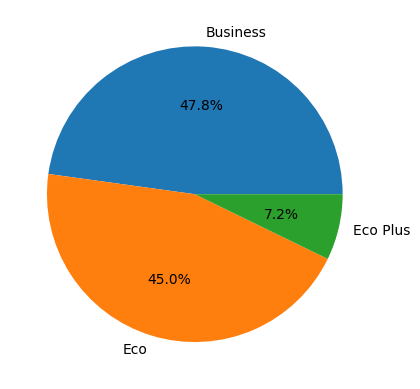

In [16]:
lables = ['Business','Eco','Eco Plus']
size =[49533,46593,7468]

plt.show()
plt.pie(size,labels=lables,autopct='%1.1f%%')

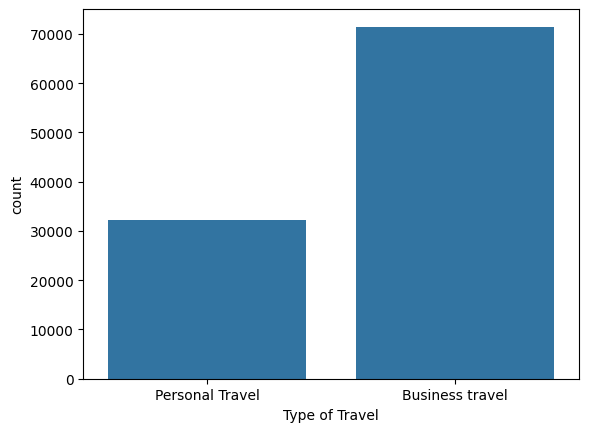

In [17]:
sns.countplot(x='Type of Travel',data=df)
plt.show()

<Axes: >

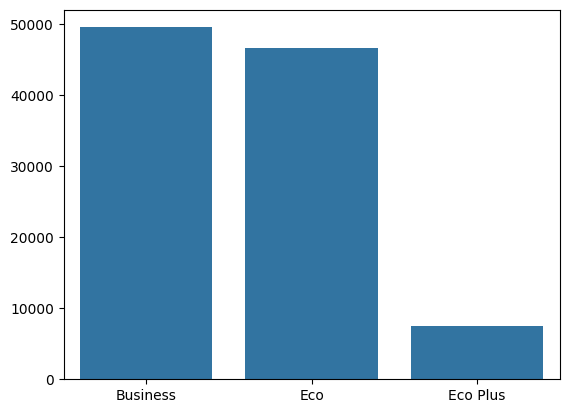

In [18]:
count = list(df['Class'].value_counts().values)
sns.barplot(x=label,y=count)

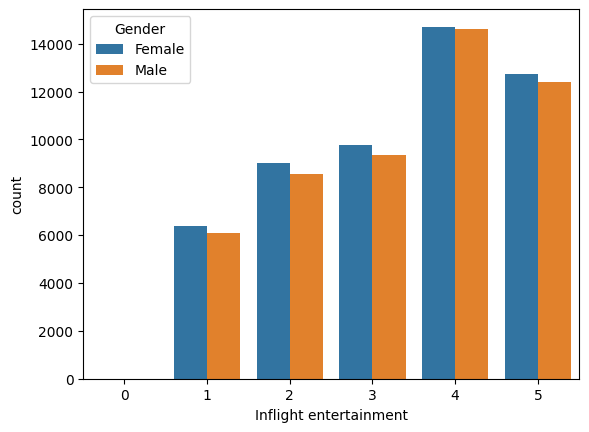

In [19]:
sns.countplot(x='Inflight entertainment',data=df,hue="Gender")
plt.show()

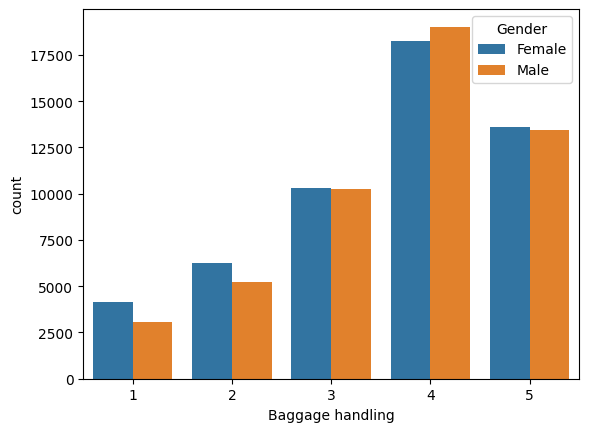

In [20]:
sns.countplot(x='Baggage handling',data=df,hue="Gender")
plt.show()

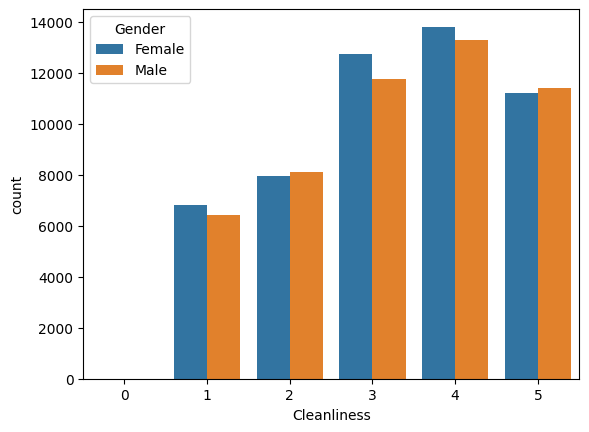

In [21]:
sns.countplot(x='Cleanliness',data=df,hue="Gender")
plt.show()

In [22]:
#from sklearn.preprocessing import OneHotEncoder,LabelEncoder
# onehot encoding representation
df2=pd.get_dummies(df,drop_first="if_binary").astype(int)

In [23]:
df2

,Age,Flight Distance,Inflight entertainment,Baggage handling,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus,satisfaction_satisfied
0,13,460,5,4,5,25,18,1,0,1,0,1,0
1,25,235,1,3,1,1,6,1,1,0,0,0,0
2,26,1142,5,4,5,0,0,0,0,0,0,0,1
3,25,562,2,3,2,11,9,0,0,0,0,0,0
4,61,214,3,4,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,23,192,2,4,2,3,0,0,1,0,1,0,0
103900,49,2347,5,5,4,0,0,1,0,0,0,0,1
103901,30,1995,4,4,4,7,14,1,1,0,0,0,0
103902,22,1000,1,1,1,0,0,0,1,0,1,0,0


In [24]:
x = df2.drop('satisfaction_satisfied',axis='columns')
y = df2[['satisfaction_satisfied']]

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [27]:
## model or algo. training

from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [28]:
lgr.fit(x_train,y_train)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
print("Training score : ",lgr.score(x_train,y_train)*100)
print("Testing score : ",lgr.score(x_test,y_test)*100)

Training score :  80.27511312217194
Testing score :  80.19692070080602


In [30]:
#prediction
pred=lgr.predict(x_test)

In [31]:
y_test['prediction']=pred

In [32]:
from sklearn.metrics import confusion_matrix,classification_report

In [33]:
confusion_matrix(y_test['satisfaction_satisfied'],y_test['prediction'])

array([[9561, 2152],
       [1951, 7055]])

In [34]:
(9636+6860)/(9636+6860+2059+2164)

0.796177421690236

In [35]:
print(classification_report(y_test['satisfaction_satisfied'],y_test['prediction']))

              precision    recall  f1-score   support

           0       0.83      0.82      0.82     11713
           1       0.77      0.78      0.77      9006

    accuracy                           0.80     20719
   macro avg       0.80      0.80      0.80     20719
weighted avg       0.80      0.80      0.80     20719



In [39]:
import joblib
os.makedirs('models',exist_ok=True)
joblib.dump(lgr,'./models/logistic_regression.lb')

['./models/logistic_regression.lb']

In [40]:
lgr

LogisticRegression()